# Import data from graphQL API

In [1]:
import pandas as pd
import json

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import requests
import re
from nltk.tokenize import *
from nltk.corpus import stopwords
import string
import nltk

from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
filename = '../text_files/gitcoin_votes.json'
df = json.load(open(filename))

df

[{'id': '0xbf7851b2228808a5de43ae27a0bd80a88380b64214c23ca01d487d544eeaa998',
  'voter': '0x77d40c87D423eFb7ec576e80998A48377Adf86dF',
  'created': 1650026916,
  'proposal': {'id': '0x77b9cfe4130db0c852394b66991248ed5305c0a495639878338ce2a6c568f8f0'},
  'choice': 2,
  'space': {'id': 'gitcoindao.eth'}},
 {'id': '0x8af6d329a4b9ebb9d940ab37807e0a2debf5d89797b220cb0c9f6084be72ce49',
  'voter': '0x2dBC54D6993a1db9BE6431292036641Ec73E8C70',
  'created': 1650026130,
  'proposal': {'id': '0x77b9cfe4130db0c852394b66991248ed5305c0a495639878338ce2a6c568f8f0'},
  'choice': 1,
  'space': {'id': 'gitcoindao.eth'}},
 {'id': '0x44ab8a140e6259eebd5bc0d04d47d277898d02b05046fdd451c71c5a52659c1e',
  'voter': '0xe5F55468585ef91CF1a87aa3aF4c830FA7AE78dE',
  'created': 1650026084,
  'proposal': {'id': '0x77b9cfe4130db0c852394b66991248ed5305c0a495639878338ce2a6c568f8f0'},
  'choice': 2,
  'space': {'id': 'gitcoindao.eth'}},
 {'id': '0x85dad32fc6dc50e6b2504869a60f9fc277caa11220cdeb794de5383335ef4cdf',
  'vote

In [3]:
df = pd.DataFrame(df)
df

id  \
0     0xbf7851b2228808a5de43ae27a0bd80a88380b64214c2...   
1     0x8af6d329a4b9ebb9d940ab37807e0a2debf5d89797b2...   
2     0x44ab8a140e6259eebd5bc0d04d47d277898d02b05046...   
3     0x85dad32fc6dc50e6b2504869a60f9fc277caa11220cd...   
4     0xfc634bc337e91d453aa5d44161c663b4032892bc175a...   
...                                                 ...   
5995  0x7738e8d848413a121dba21da01d3bb09836b423430cb...   
5996  0xa0b8fb5d5d626325463f7b69db3ef1ff3908915e4c2c...   
5997  0x325a353f6e46352e3a64afe6107e3960910470d10760...   
5998  0x81dd7e18f3d6a37acad0d89bd9f1abb96828ba74784f...   
5999  0xb60bb0825b3781270bf488cee1b0b14284ec03a219bc...   

                                           voter     created  \
0     0x77d40c87D423eFb7ec576e80998A48377Adf86dF  1650026916   
1     0x2dBC54D6993a1db9BE6431292036641Ec73E8C70  1650026130   
2     0xe5F55468585ef91CF1a87aa3aF4c830FA7AE78dE  1650026084   
3     0x0CF30daf2Fb962Ed1d5D19C97F5f6651F3b691c1  1650025664   
4     0x6CEEa0FC41387fC6780aA78125ffdE3EcE0dc103  1650025549   
...                                          ...         ...   
5995  0x86Bc0B034659801B92F10D85f8EefA40F5a97ee7  1637851960   
5996  0x7FF4F8FE1dBbBA8Dc27103359BF96e97a4d44114  1637851376   
5997  0x7FF4F8FE1dBbBA8Dc27103359BF96e97a4d44114  1637851362   
5998  0x7891294925487a8fd12e158273383C841813c008  1637848228   
5999  0x6c8ade549C4295352b98bc5bA63B179568e33f0f  1637847684   

                                               proposal  choice  \
0     {'id': '0x77b9cfe4130db0c852394b66991248ed5305...       2   
1     {'id': '0x77b9cfe4130db0c852394b66991248ed5305...       1   
2     {'id': '0x77b9cfe4130db0c852394b66991248ed5305...       2   
3     {'id': '0x77b9cfe4130db0c852394b66991248ed5305...       2   
4     {'id': '0x77b9cfe4130db0c852394b66991248ed5305...       1   
...                                                 ...     ...   
5995  {'id': '0xf206afbc1021d710f548d0414d6caaa752c3...       1   
5996  {'id': '0x4efcc747d7eee626a42e23bea82826964a57...       1   
5997  {'id': '0x2ccad330b1d12a8fd0c00835bf8cf2b84a2f...       1   
5998  {'id': '0x2ccad330b1d12a8fd0c00835bf8cf2b84a2f...       3   
5999  {'id': '0xf206afbc1021d710f548d0414d6caaa752c3...       1   

                         space  
0     {'id': 'gitcoindao.eth'}  
1     {'id': 'gitcoindao.eth'}  
2     {'id': 'gitcoindao.eth'}  
3     {'id': 'gitcoindao.eth'}  
4     {'id': 'gitcoindao.eth'}  
...                        ...  
5995  {'id': 'gitcoindao.eth'}  
5996  {'id': 'gitcoindao.eth'}  
5997  {'id': 'gitcoindao.eth'}  
5998  {'id': 'gitcoindao.eth'}  
5999  {'id': 'gitcoindao.eth'}  

[6000 rows x 6 columns]

In [4]:
df.dtypes

id          object
voter       object
created      int64
proposal    object
choice       int64
space       object
dtype: object

## Clean variables

In [5]:
df.proposal = df.proposal.astype('str')
df.proposal = df.proposal.str.lstrip("{'id': '") #[-15:]
df.proposal = df.proposal.str.rstrip("'}")

In [6]:
df.proposal

0       0x77b9cfe4130db0c852394b66991248ed5305c0a49563...
1       0x77b9cfe4130db0c852394b66991248ed5305c0a49563...
2       0x77b9cfe4130db0c852394b66991248ed5305c0a49563...
3       0x77b9cfe4130db0c852394b66991248ed5305c0a49563...
4       0x77b9cfe4130db0c852394b66991248ed5305c0a49563...
                              ...                        
5995    0xf206afbc1021d710f548d0414d6caaa752c375c025c7...
5996    0x4efcc747d7eee626a42e23bea82826964a5753295ae7...
5997    0x2ccad330b1d12a8fd0c00835bf8cf2b84a2f51ff187b...
5998    0x2ccad330b1d12a8fd0c00835bf8cf2b84a2f51ff187b...
5999    0xf206afbc1021d710f548d0414d6caaa752c375c025c7...
Name: proposal, Length: 6000, dtype: object

# Voter Insights

In [7]:
#number of proposals
df.proposal.nunique()

20

In [8]:
#number of voters
df.voter.nunique()

1393

## Votes per proposal

In [9]:
votesprop = pd.DataFrame(df.groupby('proposal')['voter'].count())
votesprop

voter
proposal                                                 
0x29eaaff1ca752785b508298b4aaf5d4bf3173e9b3859b...    336
0x2ccad330b1d12a8fd0c00835bf8cf2b84a2f51ff187bc...    237
0x3fdc2452ce289ea193413b3f169577f4dea05373fb6c5...    555
0x4efcc747d7eee626a42e23bea82826964a5753295ae77...    172
0x54a5344b67a260f4951ee957e7da2191557a34de39512...    509
0x5784ba66b16153b15cd2b94625909cb1b4ee7d1c6b5f0...    251
0x6a7500e65d65468fede15c1a447b1077e75fe66dd4ca8...    238
0x6acb83e8757ea5421a23d4f5ef082cf9455d4bc79f414...    274
0x6cf2d1e9d1f00ed74d296b719c46327d66a1af2be5275...    170
0x77b9cfe4130db0c852394b66991248ed5305c0a495639...    484
0x93d337378cc8c6c507b88ebb518ddd57f772bb010b75c...    234
0x97a2ed00ed7c5f06d731724856e8a96755ceb38d3e35a...    271
0xa4dd8527231eeb912929e0874b689144565fc6d2cbc0f...    355
0xa6fa6cae4e3c341f4b65a580779e3e66430e02b8979e5...    228
0xa7f5df0710cba3a190df10a054ce3b4e7225bcfd65b91...    215
0xaf6b1e2a1a7ed4022b214baccd5e3d12b9037b009e4ea...    224
0xd7e430bdbff261f3b32738e44f91efe85512f9a3359e3...    484
0xe0c6d911e8c06e8ed28071ebfe84d8dfa90c1381dbfc0...    429
0xe74f2ddceaf3a50cb7c6de9ae1be5ace0bed4c5c34ca9...    314
0xf206afbc1021d710f548d0414d6caaa752c375c025c7e...     20

In [10]:
votesprop = votesprop.reset_index(level=0)

In [11]:
votesprop['proposal'] = votesprop['proposal'].str[-5:]

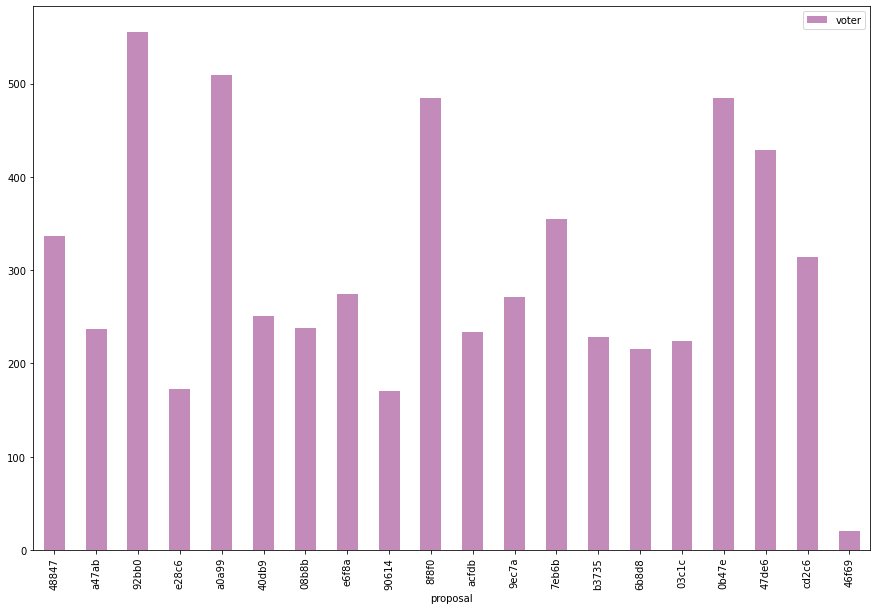

In [12]:
import matplotlib.pyplot as plt

votesprop.plot.bar(x= 'proposal', y='voter', figsize =(15,10), color = '#C38BB9', )
#plt.savefig('proposals.png', background=False)


In [13]:
colors_clusters = ['#83FFB0', '#C38BB9', '#F0D161', '#404943']

In [14]:
fig = px.bar(votesprop, x = 'proposal', 
                 y = 'voter')
fig.update_layout({
'plot_bgcolor': 'rgba (0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.show()

In [15]:
votesprop.shape

(20, 2)

In [16]:
votesprop = votesprop.sort_values(by='voter', ascending = False)
votesprop

proposal  voter
2     92bb0    555
4     a0a99    509
16    0b47e    484
9     8f8f0    484
17    47de6    429
12    7eb6b    355
0     48847    336
18    cd2c6    314
7     e6f8a    274
11    9ec7a    271
5     40db9    251
6     08b8b    238
1     a47ab    237
10    acfdb    234
13    b3735    228
15    03c1c    224
14    6b8d8    215
3     e28c6    172
8     90614    170
19    46f69     20

## Participation index

In [18]:
(votesprop.voter.sum())/ 20

300.0

## Holders wallets (revise this)

In [19]:
holders = pd.read_csv('../datasets/gitcoin/gitcoin_tokenholders.csv')
holders

HolderAddress       Balance  \
0      0x84f46686b5b76f04e7b13b44c8e38d2f90a5f120  3.000000e+00   
1      0x0bb8fa3a3684ce13d6be7e42ce988b75fe65c3de  3.000000e+00   
2      0xa0d439cf0729736a4061b5c0a3f59a29a7bc7f55  2.000000e+00   
3      0xf90b108640564336adecf0cdddeca8890df39ccf  2.000000e+00   
4      0x88f9961ab0573a3830ea2c53d9120b71057252f4  4.316272e+06   
...                                           ...           ...   
19136  0xc2d4548ea8f00e27b6bc4da2fdf9bb24663c16f7  7.900338e-02   
19137  0xe5bbfa4afe00b3c9e4be129d1690ecaeb9e2352c  4.624550e+01   
19138  0xa257a46a63f8ec57d973743cf188c2267bba6736  2.245800e+01   
19139  0x854bfa21dc9cb8c5069f1d952362a5a3d4b83056  1.780818e+02   
19140  0x23653ed1192381c00f21e8a02af5ea142d4b07eb  8.322310e+01   

      PendingBalanceUpdate  
0                       No  
1                       No  
2                       No  
3                       No  
4                       No  
...                    ...  
19136                   No  
19137                   No  
19138                   No  
19139                   No  
19140                   No  

[19141 rows x 3 columns]

In [20]:
holders = holders.drop(columns='PendingBalanceUpdate')

In [21]:
holders.columns = ['voter', 'Balance']
holders = holders.sort_values(by='Balance', ascending = False)
holders

voter       Balance
30     0x44aa9c5a034c1499ec27906e2d427b704b567ffe  4.621899e+07
2933   0x57a8865cfb1ecef7253c27da6b4bc3daee5be518  4.740533e+06
4      0x88f9961ab0573a3830ea2c53d9120b71057252f4  4.316272e+06
9704   0x28c6c06298d514db089934071355e5743bf21d60  2.050041e+06
10604  0x34bc437c037c6a266c761ae117fd99dd9619e03c  2.037987e+06
...                                           ...           ...
3555   0xdf6c53df56f3992fc44195518a2d8b16306af9ff  1.000000e-18
3486   0xfd9ffc51175278dd0bc1de8aa8fe8065b0cb90c0  1.000000e-18
16741  0x9410640e7e3d9bf052015d68c7af6345514e8ae5  1.000000e-18
3257   0x70d15f829e1b764373e3abf2aedcf4aad94064de  1.000000e-18
3910   0xa127534b8ae63ad38839a598a00c3f42b6fb1ddc  1.000000e-18

[19141 rows x 2 columns]

In [22]:
htop = holders.head(10)

In [23]:
holders.shape

(19141, 2)

In [24]:
import plotly.express as px

In [25]:
px.pie(htop, values = 'Balance', names='voter', color_discrete_sequence=px.colors.sequential.Tealgrn)

fig.update_layout({'plot_bgcolor': 'rgba (0, 0, 0, 0)', 'paper_bgcolor': 'rgba(0, 0, 0, 0)'})
fig.show()

#plt.savefig('piechart.png', transparent=True)

In [26]:
def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = 311 #int(360.0 * 46.0 / 255.0)
    s = 33 #int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)



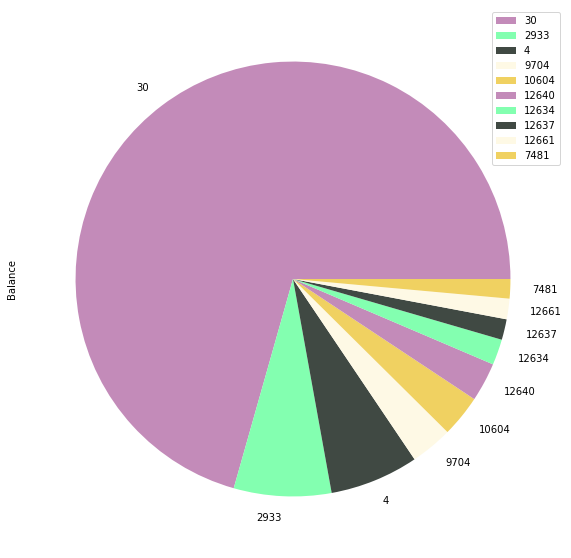

In [28]:
plot = holders.head(10).plot.pie(y='Balance', figsize=(10, 10), colors = ['#C38BB9', '#83FFB0', '#404943', '#FEF9E5', '#F0D161'])

In [29]:
df.voter = df.voter.astype(str)
holders.voter = holders.voter.astype(str)

In [30]:
voters = pd.merge(df, holders, on='voter', how='inner')
voters

id  \
0  0xa8507f2b588df488f7cbbe9cf16073e422779fd63a5e...   

                                        voter     created  \
0  0x9147dc23a24073b7a4210173383b90e6437c507e  1637907074   

                                            proposal  choice  \
0  0x2ccad330b1d12a8fd0c00835bf8cf2b84a2f51ff187b...       1   

                      space  Balance  
0  {'id': 'gitcoindao.eth'}  54.1172

# Proposal insights

In [31]:
filename = '../text_files/gitcoin_proposals.json'
df1 = json.load(open(filename))

df1

[{'id': '0x77b9cfe4130db0c852394b66991248ed5305c0a495639878338ce2a6c568f8f0',
  'title': 'Partnership & Mutual Grant with Wonder',
  'body': 'Summary\n\nThis proposal, if passed, would issue 50,000 GTC for governance rights equating to 1,500,000 $WONDER tokens (1.5% of total supply) when Wonder’s token is live. \n\nIn addition, upon launch, 1% of Wonder’s treasury will be used for QF rounds via Gitcoin Aqueduct 2, to fund projects that are on or will be started on Wonder.\n\nThe purpose of this alliance is to solidify the partnership between Gitcoin and Wonder where we can work together to enable DAOs to succeed.\n\nMotivation\n\nGitcoin and Wonder are pursuing aligned missions.\n\nGitcoin’s mission is to build & fund the open web; Wonder is building the necessary tools to facilitate thriving projects on the open web.\n\nWonder’s task management system allows DAOs to intuitively organize projects, pay contributors with their native token, and onboard new members with ease.\n\nGitcoin, 

In [32]:
df1 = pd.DataFrame(df1)
df1

id  \
0   0x77b9cfe4130db0c852394b66991248ed5305c0a49563...   
1   0xe0c6d911e8c06e8ed28071ebfe84d8dfa90c1381dbfc...   
2   0xd7e430bdbff261f3b32738e44f91efe85512f9a3359e...   
3   0x54a5344b67a260f4951ee957e7da2191557a34de3951...   
4   0x5784ba66b16153b15cd2b94625909cb1b4ee7d1c6b5f...   
5   0xa7f5df0710cba3a190df10a054ce3b4e7225bcfd65b9...   
6   0x6cf2d1e9d1f00ed74d296b719c46327d66a1af2be527...   
7   0x6a7500e65d65468fede15c1a447b1077e75fe66dd4ca...   
8   0xa6fa6cae4e3c341f4b65a580779e3e66430e02b8979e...   
9   0x93d337378cc8c6c507b88ebb518ddd57f772bb010b75...   
10  0xa4dd8527231eeb912929e0874b689144565fc6d2cbc0...   
11  0xaf6b1e2a1a7ed4022b214baccd5e3d12b9037b009e4e...   
12  0x97a2ed00ed7c5f06d731724856e8a96755ceb38d3e35...   
13  0x6acb83e8757ea5421a23d4f5ef082cf9455d4bc79f41...   
14  0x3fdc2452ce289ea193413b3f169577f4dea05373fb6c...   
15  0x29eaaff1ca752785b508298b4aaf5d4bf3173e9b3859...   
16  0xe74f2ddceaf3a50cb7c6de9ae1be5ace0bed4c5c34ca...   
17  0x2ccad330b1d12a8fd0c00835bf8cf2b84a2f51ff187b...   
18  0x4efcc747d7eee626a42e23bea82826964a5753295ae7...   
19  0xf206afbc1021d710f548d0414d6caaa752c375c025c7...   
20  0x265fe70790524875caacb6675ef6d10b4d4ceac8b1c2...   
21  0xd65bb1c535d0c83ec197df8d000464c6fb7a6ef000ad...   
22  0x230bcb7d3548048fc94e5745f7934d80bfc357632af1...   
23     QmUMKpGM6daj2Lo7Wb8urz6hG4gvfoDu94fpBgueRZGYDi   
24     QmQTMLG8qbDpTCCUwVnbEmzLkdCvf1ApZ8w9nd9idfC8r7   
25     QmZbt14YZBzLtx4umQ9hxSwxZFRsV8BNr9VV7dGoKRsDLT   
26     QmSRTDaRckWkWBBAHDXXyatMFLUZcFjSCkvHSBuC84fgbf   
27     QmZYrZKBaExvZsnNNfKbFixJe2C7PNY96DtoF1tQtdNhLN   
28     QmUq5WsYE9ryLEbt4NnGsuGQgzX7n5eeB2edKogVGkTz83   
29     QmchtUum2drB3NAgCqDxKWVhqs8JrCdGHX5W5s4CHsVMw1   
30     QmSYVGy8KMrWu3Lrue8ah9zrWZb4wrCJboi4o5KDmNS6P2   
31     QmQWucgbue8uemNHXTDKvvEhRxfEcoB6B6Ci51TANkKaGU   
32     Qmf8du3yfvYvFsXRDQHfUMvafFBAMWb2ujC6KjWQZ8Mqky   
33     QmY7yvzid9KM8Jn5MrAXe853wRmk5tjNSzW2DR82q8Z5RJ   
34     QmdLNbbE4CHPwyhfsqjj1qzst2NFjXS6Ax3moqWwgVWjQa   
35     QmZTskr6yb4tSF7Jnnvd5a2YsuJJBDveEv4hbK6QJM83SB   
36     QmQe6fHVDsvE91ShNagvFojetuWHu6xKn7izk46Dg2cQmK   
37     QmRbuBUX7vtNhYwYqYG3Jd4LqaRXVM8qDgjNojGEAzJdnH   
38     Qmd5Lmq1Z1iDuZkvcVDGdrwttUyUfdUeACHSMxFxYx3PbM   
39     QmeLMJpaVF4vMth4EkmJ7qnSriPgff9SRhkR5mznfFk57x   
40     Qmf6hFhnn3yhMYE7omvEoXTEKjzYuKeAzxK7X2t5MkvCF2   
41     QmR1mSZaQP8HEMU8nSMeBM5pVvkGoGG3TVu2H5aDuXyB8m   
42     QmSGhHLTcE8yemYF2FXapeziRVZqT1pPoxAw4B3dnmcZJg   
43     QmSWmxbFxjTQR2oRfodTyFjtDJHkjWmruRsTMXPC4zS253   
44     Qmcr1T1EZRZmvP4fvbFvDSdTmhLBCPmkYTdweSWdiyFj65   
45     QmZeogNXZPuLj3LMW9bZ6AGHdsxhBpvmiKCwMyagTsuLWV   
46     QmaNNqMPXYMbuBgu8Q5SuLPD2GDoAnrsDMN361cjefKPYP   
47     QmUoBpLsMSZ7Aq1UEzvEyGyTdR8Reeb8qQFGUhcQLqcQMM   
48     QmeGrN1bxYyt3RGqLkJL6v8XLpz3W2FyYSmpZxAiCxhF2m   
49     QmSXwJCKpC7fnWqdvjPdMMMgA1Z8q5NbJXU5XT4CVftJsv   
50     QmaPNPYLCP2nJG5am8pwqJErEhzDMXUw5Z7DuuYjyrRG6p   

                                                title  \
0              Partnership & Mutual Grant with Wonder   
1   Ratify the Results of Grants Round 13 and Form...   
2   Should we adopt the Gitcoin Foundation and tak...   
3                     Steward Council Term Allocation   
4              The Steward Council Election & Mandate   
5                      GR13 Matching Pool Allocations   
6                        dCompass S13 funding request   
7       Moonshot Collective (MSC) S13 funding request   
8   Memes, Merch and Marketing (MMM) S13 budget re...   
9   Fraud Defense & Detection (FDD) S13 budget req...   
10       Gitcoin DAO - Workstream Accountability Flow   
11     DAO Operations (DAOOps) Q1 2022 budget request   
12  Ratify the Results of Grants Round 12 and Form...   
13  Public Goods Funding Workstream Budget Request...   
14  Redistribute GTC to Individuals Who Could Not ...   
15                               PrimeDAO Partnership   
16                           DeveloperDAO Partnership   
17                     GR12 Matching Pool Allocations   
18 

In [33]:
type(df1.title)

pandas.core.series.Series

## Tokenizing for the topic modelling

In [34]:
def clean_tokens(text, language):

    words = [w for w in [word for word in [w.lower() for w in word_tokenize(text)] if word.isalpha()] if not w in set(stopwords.words('english'))]
    
    return words

In [35]:
df1['clean_title'] = df1['title'].apply(lambda x: clean_tokens(x, 'english'))

In [36]:
df1['clean_body'] = df1['body'].apply(lambda x: clean_tokens(x, 'english'))

In [37]:
df1

id  \
0   0x77b9cfe4130db0c852394b66991248ed5305c0a49563...   
1   0xe0c6d911e8c06e8ed28071ebfe84d8dfa90c1381dbfc...   
2   0xd7e430bdbff261f3b32738e44f91efe85512f9a3359e...   
3   0x54a5344b67a260f4951ee957e7da2191557a34de3951...   
4   0x5784ba66b16153b15cd2b94625909cb1b4ee7d1c6b5f...   
5   0xa7f5df0710cba3a190df10a054ce3b4e7225bcfd65b9...   
6   0x6cf2d1e9d1f00ed74d296b719c46327d66a1af2be527...   
7   0x6a7500e65d65468fede15c1a447b1077e75fe66dd4ca...   
8   0xa6fa6cae4e3c341f4b65a580779e3e66430e02b8979e...   
9   0x93d337378cc8c6c507b88ebb518ddd57f772bb010b75...   
10  0xa4dd8527231eeb912929e0874b689144565fc6d2cbc0...   
11  0xaf6b1e2a1a7ed4022b214baccd5e3d12b9037b009e4e...   
12  0x97a2ed00ed7c5f06d731724856e8a96755ceb38d3e35...   
13  0x6acb83e8757ea5421a23d4f5ef082cf9455d4bc79f41...   
14  0x3fdc2452ce289ea193413b3f169577f4dea05373fb6c...   
15  0x29eaaff1ca752785b508298b4aaf5d4bf3173e9b3859...   
16  0xe74f2ddceaf3a50cb7c6de9ae1be5ace0bed4c5c34ca...   
17  0x2ccad330b1d12a8fd0c00835bf8cf2b84a2f51ff187b...   
18  0x4efcc747d7eee626a42e23bea82826964a5753295ae7...   
19  0xf206afbc1021d710f548d0414d6caaa752c375c025c7...   
20  0x265fe70790524875caacb6675ef6d10b4d4ceac8b1c2...   
21  0xd65bb1c535d0c83ec197df8d000464c6fb7a6ef000ad...   
22  0x230bcb7d3548048fc94e5745f7934d80bfc357632af1...   
23     QmUMKpGM6daj2Lo7Wb8urz6hG4gvfoDu94fpBgueRZGYDi   
24     QmQTMLG8qbDpTCCUwVnbEmzLkdCvf1ApZ8w9nd9idfC8r7   
25     QmZbt14YZBzLtx4umQ9hxSwxZFRsV8BNr9VV7dGoKRsDLT   
26     QmSRTDaRckWkWBBAHDXXyatMFLUZcFjSCkvHSBuC84fgbf   
27     QmZYrZKBaExvZsnNNfKbFixJe2C7PNY96DtoF1tQtdNhLN   
28     QmUq5WsYE9ryLEbt4NnGsuGQgzX7n5eeB2edKogVGkTz83   
29     QmchtUum2drB3NAgCqDxKWVhqs8JrCdGHX5W5s4CHsVMw1   
30     QmSYVGy8KMrWu3Lrue8ah9zrWZb4wrCJboi4o5KDmNS6P2   
31     QmQWucgbue8uemNHXTDKvvEhRxfEcoB6B6Ci51TANkKaGU   
32     Qmf8du3yfvYvFsXRDQHfUMvafFBAMWb2ujC6KjWQZ8Mqky   
33     QmY7yvzid9KM8Jn5MrAXe853wRmk5tjNSzW2DR82q8Z5RJ   
34     QmdLNbbE4CHPwyhfsqjj1qzst2NFjXS6Ax3moqWwgVWjQa   
35     QmZTskr6yb4tSF7Jnnvd5a2YsuJJBDveEv4hbK6QJM83SB   
36     QmQe6fHVDsvE91ShNagvFojetuWHu6xKn7izk46Dg2cQmK   
37     QmRbuBUX7vtNhYwYqYG3Jd4LqaRXVM8qDgjNojGEAzJdnH   
38     Qmd5Lmq1Z1iDuZkvcVDGdrwttUyUfdUeACHSMxFxYx3PbM   
39     QmeLMJpaVF4vMth4EkmJ7qnSriPgff9SRhkR5mznfFk57x   
40     Qmf6hFhnn3yhMYE7omvEoXTEKjzYuKeAzxK7X2t5MkvCF2   
41     QmR1mSZaQP8HEMU8nSMeBM5pVvkGoGG3TVu2H5aDuXyB8m   
42     QmSGhHLTcE8yemYF2FXapeziRVZqT1pPoxAw4B3dnmcZJg   
43     QmSWmxbFxjTQR2oRfodTyFjtDJHkjWmruRsTMXPC4zS253   
44     Qmcr1T1EZRZmvP4fvbFvDSdTmhLBCPmkYTdweSWdiyFj65   
45     QmZeogNXZPuLj3LMW9bZ6AGHdsxhBpvmiKCwMyagTsuLWV   
46     QmaNNqMPXYMbuBgu8Q5SuLPD2GDoAnrsDMN361cjefKPYP   
47     QmUoBpLsMSZ7Aq1UEzvEyGyTdR8Reeb8qQFGUhcQLqcQMM   
48     QmeGrN1bxYyt3RGqLkJL6v8XLpz3W2FyYSmpZxAiCxhF2m   
49     QmSXwJCKpC7fnWqdvjPdMMMgA1Z8q5NbJXU5XT4CVftJsv   
50     QmaPNPYLCP2nJG5am8pwqJErEhzDMXUw5Z7DuuYjyrRG6p   

                                                title  \
0              Partnership & Mutual Grant with Wonder   
1   Ratify the Results of Grants Round 13 and Form...   
2   Should we adopt the Gitcoin Foundation and tak...   
3                     Steward Council Term Allocation   
4              The Steward Council Election & Mandate   
5                      GR13 Matching Pool Allocations   
6                        dCompass S13 funding request   
7       Moonshot Collective (MSC) S13 funding request   
8   Memes, Merch and Marketing (MMM) S13 budget re...   
9   Fraud Defense & Detection (FDD) S13 budget req...   
10       Gitcoin DAO - Workstream Accountability Flow   
11     DAO Operations (DAOOps) Q1 2022 budget request   
12  Ratify the Results of Grants Round 12 and Form...   
13  Public Goods Funding Workstream Budget Request...   
14  Redistribute GTC to Individuals Who Could Not ...   
15                               PrimeDAO Partnership   
16                           DeveloperDAO Partnership   
17                     GR12 Matching Pool Allocations   
18 

## Language detection

In [38]:
def clean_text(text):
    
    '''Make text lowercase, remove text in square brackets,
    remove links,remove punctuation
    and remove words containing numbers.'''
    
    text = text.lower()
    text = re.sub('\[.*?\]', '', text) #remove text in square brackets
    text = re.sub('https?://\S+|www\.\S+', '', text) #remove urls, https
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text) #get rid of digits, ie numbers
    return text

In [39]:
from langdetect import detect

In [40]:
def language_detection(text):
    try:
        return detect(text)
    except:
        return None

In [41]:
df1['clean_title2'] = df1['title'].apply(lambda x: clean_text(x))

In [42]:
df1['clean_body2'] = df1['body'].apply(lambda x: clean_text(x))

In [43]:
df1['clean_body2'].iloc[:10]

0    summarythis proposal if passed would issue  gt...
1    we ask our community stewards to ratify the  p...
2    this proposal is to signal that we as a commun...
3    the proposal is that a pool of gtc is allocate...
4    this proposal seeks to elect the members of th...
5    this snapshot vote is looking to finalize a de...
6    tldrthe dcompass workstream is requesting a to...
7    tldr we are growing we are tooling up we’ve al...
8    the mmm workstream is requesting a total of  g...
9    workstream mandate defend gitcoin grants dao  ...
Name: clean_body2, dtype: object

In [44]:
%%time

df1['language'] = df1['clean_body2'].apply(language_detection)

df1.to_csv('gitcoin_lang_processed.csv', index=False)

CPU times: user 561 ms, sys: 23.2 ms, total: 584 ms
Wall time: 596 ms


In [45]:
df = pd.read_csv('../datasets/gitcoin/gitcoin_lang_processed.csv')

In [46]:
df.language.unique()

array(['en', nan, 'es', 'zh-cn'], dtype=object)

In [47]:
df.language.value_counts()

en       47
es        1
zh-cn     1
Name: language, dtype: int64

## Wordclouds

In [ ]:
#df1['tok_title'] = df1['clean_title2'].apply(lambda x:  nltk.word_tokenize(x))

In [ ]:
#df1['tok_body'] = df1['clean_body2'].apply(lambda x:  nltk.word_tokenize(x))

In [ ]:
df1

In [48]:
from wordcloud import WordCloud

In [49]:
title = df1['title']
body = df1['body']

In [50]:
" ".join(title)

'Partnership & Mutual Grant with Wonder Ratify the Results of Grants Round 13 and Formally Request the Community Multisig to Payout Matching Allocations Should we adopt the Gitcoin Foundation and take legal possession of philanthropic assets from Gitcoin Holdings Steward Council Term Allocation The Steward Council Election & Mandate GR13 Matching Pool Allocations dCompass S13 funding request Moonshot Collective (MSC) S13 funding request Memes, Merch and Marketing (MMM) S13 budget request Fraud Defense & Detection (FDD) S13 budget request Gitcoin DAO - Workstream Accountability Flow DAO Operations (DAOOps) Q1 2022 budget request Ratify the Results of Grants Round 12 and Formally Request the Community Multisig to Payout Matching Allocations  Public Goods Funding Workstream Budget Request for Q1 2022 Redistribute GTC to Individuals Who Could Not Claim Due to Error PrimeDAO Partnership DeveloperDAO Partnership GR12 Matching Pool Allocations Why the price of GTC is lower than RAD? Does GTC 

In [51]:
" ".join(body)

'Summary\n\nThis proposal, if passed, would issue 50,000 GTC for governance rights equating to 1,500,000 $WONDER tokens (1.5% of total supply) when Wonder’s token is live. \n\nIn addition, upon launch, 1% of Wonder’s treasury will be used for QF rounds via Gitcoin Aqueduct 2, to fund projects that are on or will be started on Wonder.\n\nThe purpose of this alliance is to solidify the partnership between Gitcoin and Wonder where we can work together to enable DAOs to succeed.\n\nMotivation\n\nGitcoin and Wonder are pursuing aligned missions.\n\nGitcoin’s mission is to build & fund the open web; Wonder is building the necessary tools to facilitate thriving projects on the open web.\n\nWonder’s task management system allows DAOs to intuitively organize projects, pay contributors with their native token, and onboard new members with ease.\n\nGitcoin, a DAO of DAOs, benefits from partnership with projects that provide the infrastructure for a nascent DAO ecosystem. Specifically, Wonder can 

In [52]:
bodyw = " ".join(body)
bodyw = bodyw.replace('proposal', '')
bodyw = bodyw.replace('gitcoin', '')
bodyw = bodyw.replace('Gitcoin', '')
bodyw = bodyw.replace('dao', '')
bodyw = bodyw.replace("’s",'')
bodyw = bodyw.replace("'s",'')
bodyw = bodyw.replace("will",'')
bodyw = bodyw.replace('DAO', '')

### Edit stopwords

In [53]:
list_words = ["https", "gitcoin", "proposal"]

In [54]:
def text_preprocessing_updated(text, list_words):
    """
    Cleaning and parsing the text.
    """
    nopunc = clean_text(text)
    
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

    nopunc = tokenizer.tokenize(nopunc)

    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
    stop_words.update(list_words)
    stop_words.update(["https"])
    stop_words.update(["Gitcoin"])
    stop_words.update(["proposal"])
    
    remove_stopwords = [w for w in nopunc if w not in stop_words]
    combined_text = ' '.join(remove_stopwords)
    return combined_text

In [55]:
df1['body'] = df1['body'].apply(lambda x : text_preprocessing_updated(x, list_words))

In [56]:
def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = 140 #int(360.0 * 46.0 / 255.0)
    s = 7 #int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

In [57]:
font_path = '../style_and_formatting/DM_Sans/DMSans-Regular.ttf'

In [58]:
wordcloudb = WordCloud(background_color='#FEF9E5',
                        width=1200, height=800, color_func = random_color_func, font_path=font_path)


wordcloudb.generate(bodyw)

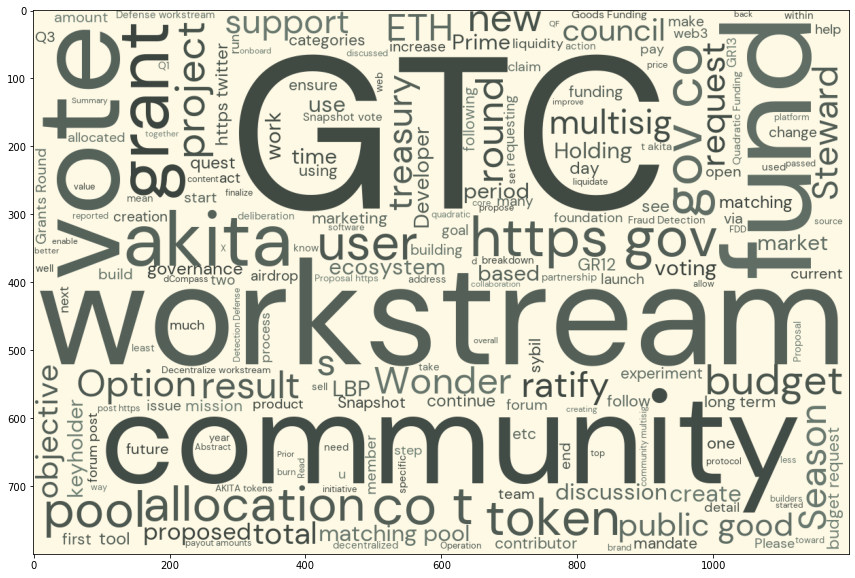

In [59]:
wordcloudb
plt.figure(figsize=(20,10))
plt.imshow(wordcloudb)

In [60]:
#wordcloudb.to_file('gitcoin_wordcloud.png')

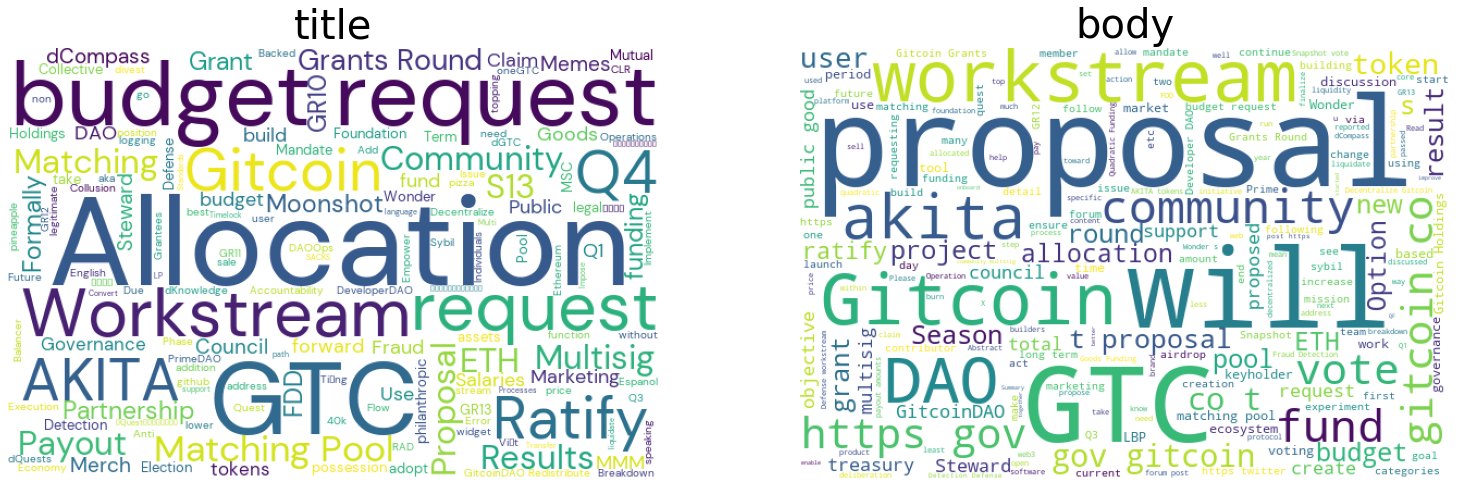

In [61]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[26, 8])

wordcloudt = WordCloud(background_color='white', font_path= font_path, 
                        width=600,
                        height=400).generate(" ".join(title))

ax1.imshow(wordcloudt)
ax1.axis('off')
ax1.set_title('title',fontsize=40)

wordcloudb = WordCloud(background_color='white',
                        width=600,
                        height=400).generate(" ".join(body))
ax2.imshow(wordcloudb)
ax2.axis('off')
ax2.set_title('body',fontsize=40);

# Topic modelling

In [62]:
import gensim
from gensim import corpora

In [63]:
def clean_stopwords (text, list_words):
    """
    Cleaning and parsing the text.
    """
    nopunc = clean_text(text)
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    nopunc = tokenizer.tokenize(nopunc)

    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
    stop_words.update(list_words)
    stop_words.update(["https"])
    stop_words.update(["Gitcoin"])
    stop_words.update(["proposal"])
    
    remove_stopwords = [w for w in nopunc if w not in stop_words]
    return text

In [64]:
df1['bodytm'] = df1['body'].apply(lambda x : clean_stopwords(x, list_words))

In [65]:
df1

id  \
0   0x77b9cfe4130db0c852394b66991248ed5305c0a49563...   
1   0xe0c6d911e8c06e8ed28071ebfe84d8dfa90c1381dbfc...   
2   0xd7e430bdbff261f3b32738e44f91efe85512f9a3359e...   
3   0x54a5344b67a260f4951ee957e7da2191557a34de3951...   
4   0x5784ba66b16153b15cd2b94625909cb1b4ee7d1c6b5f...   
5   0xa7f5df0710cba3a190df10a054ce3b4e7225bcfd65b9...   
6   0x6cf2d1e9d1f00ed74d296b719c46327d66a1af2be527...   
7   0x6a7500e65d65468fede15c1a447b1077e75fe66dd4ca...   
8   0xa6fa6cae4e3c341f4b65a580779e3e66430e02b8979e...   
9   0x93d337378cc8c6c507b88ebb518ddd57f772bb010b75...   
10  0xa4dd8527231eeb912929e0874b689144565fc6d2cbc0...   
11  0xaf6b1e2a1a7ed4022b214baccd5e3d12b9037b009e4e...   
12  0x97a2ed00ed7c5f06d731724856e8a96755ceb38d3e35...   
13  0x6acb83e8757ea5421a23d4f5ef082cf9455d4bc79f41...   
14  0x3fdc2452ce289ea193413b3f169577f4dea05373fb6c...   
15  0x29eaaff1ca752785b508298b4aaf5d4bf3173e9b3859...   
16  0xe74f2ddceaf3a50cb7c6de9ae1be5ace0bed4c5c34ca...   
17  0x2ccad330b1d12a8fd0c00835bf8cf2b84a2f51ff187b...   
18  0x4efcc747d7eee626a42e23bea82826964a5753295ae7...   
19  0xf206afbc1021d710f548d0414d6caaa752c375c025c7...   
20  0x265fe70790524875caacb6675ef6d10b4d4ceac8b1c2...   
21  0xd65bb1c535d0c83ec197df8d000464c6fb7a6ef000ad...   
22  0x230bcb7d3548048fc94e5745f7934d80bfc357632af1...   
23     QmUMKpGM6daj2Lo7Wb8urz6hG4gvfoDu94fpBgueRZGYDi   
24     QmQTMLG8qbDpTCCUwVnbEmzLkdCvf1ApZ8w9nd9idfC8r7   
25     QmZbt14YZBzLtx4umQ9hxSwxZFRsV8BNr9VV7dGoKRsDLT   
26     QmSRTDaRckWkWBBAHDXXyatMFLUZcFjSCkvHSBuC84fgbf   
27     QmZYrZKBaExvZsnNNfKbFixJe2C7PNY96DtoF1tQtdNhLN   
28     QmUq5WsYE9ryLEbt4NnGsuGQgzX7n5eeB2edKogVGkTz83   
29     QmchtUum2drB3NAgCqDxKWVhqs8JrCdGHX5W5s4CHsVMw1   
30     QmSYVGy8KMrWu3Lrue8ah9zrWZb4wrCJboi4o5KDmNS6P2   
31     QmQWucgbue8uemNHXTDKvvEhRxfEcoB6B6Ci51TANkKaGU   
32     Qmf8du3yfvYvFsXRDQHfUMvafFBAMWb2ujC6KjWQZ8Mqky   
33     QmY7yvzid9KM8Jn5MrAXe853wRmk5tjNSzW2DR82q8Z5RJ   
34     QmdLNbbE4CHPwyhfsqjj1qzst2NFjXS6Ax3moqWwgVWjQa   
35     QmZTskr6yb4tSF7Jnnvd5a2YsuJJBDveEv4hbK6QJM83SB   
36     QmQe6fHVDsvE91ShNagvFojetuWHu6xKn7izk46Dg2cQmK   
37     QmRbuBUX7vtNhYwYqYG3Jd4LqaRXVM8qDgjNojGEAzJdnH   
38     Qmd5Lmq1Z1iDuZkvcVDGdrwttUyUfdUeACHSMxFxYx3PbM   
39     QmeLMJpaVF4vMth4EkmJ7qnSriPgff9SRhkR5mznfFk57x   
40     Qmf6hFhnn3yhMYE7omvEoXTEKjzYuKeAzxK7X2t5MkvCF2   
41     QmR1mSZaQP8HEMU8nSMeBM5pVvkGoGG3TVu2H5aDuXyB8m   
42     QmSGhHLTcE8yemYF2FXapeziRVZqT1pPoxAw4B3dnmcZJg   
43     QmSWmxbFxjTQR2oRfodTyFjtDJHkjWmruRsTMXPC4zS253   
44     Qmcr1T1EZRZmvP4fvbFvDSdTmhLBCPmkYTdweSWdiyFj65   
45     QmZeogNXZPuLj3LMW9bZ6AGHdsxhBpvmiKCwMyagTsuLWV   
46     QmaNNqMPXYMbuBgu8Q5SuLPD2GDoAnrsDMN361cjefKPYP   
47     QmUoBpLsMSZ7Aq1UEzvEyGyTdR8Reeb8qQFGUhcQLqcQMM   
48     QmeGrN1bxYyt3RGqLkJL6v8XLpz3W2FyYSmpZxAiCxhF2m   
49     QmSXwJCKpC7fnWqdvjPdMMMgA1Z8q5NbJXU5XT4CVftJsv   
50     QmaPNPYLCP2nJG5am8pwqJErEhzDMXUw5Z7DuuYjyrRG6p   

                                                title  \
0              Partnership & Mutual Grant with Wonder   
1   Ratify the Results of Grants Round 13 and Form...   
2   Should we adopt the Gitcoin Foundation and tak...   
3                     Steward Council Term Allocation   
4              The Steward Council Election & Mandate   
5                      GR13 Matching Pool Allocations   
6                        dCompass S13 funding request   
7       Moonshot Collective (MSC) S13 funding request   
8   Memes, Merch and Marketing (MMM) S13 budget re...   
9   Fraud Defense & Detection (FDD) S13 budget req...   
10       Gitcoin DAO - Workstream Accountability Flow   
11     DAO Operations (DAOOps) Q1 2022 budget request   
12  Ratify the Results of Grants Round 12 and Form...   
13  Public Goods Funding Workstream Budget Request...   
14  Redistribute GTC to Individuals Who Could Not ...   
15                               PrimeDAO Partnership   
16                           DeveloperDAO Partnership   
17                     GR12 Matching Pool Allocations   
18 

In [66]:
dictionary = corpora.Dictionary(df1['clean_body'])
#dictionary.save('dictionary.dict')
dictionary

In [67]:
dictionary.token2id

{'act': 0,
 'addition': 1,
 'address': 2,
 'aligned': 3,
 'alignment': 4,
 'alliance': 5,
 'allows': 6,
 'aqueduct': 7,
 'back': 8,
 'benefits': 9,
 'better': 10,
 'build': 11,
 'building': 12,
 'collaboration': 13,
 'collaborations': 14,
 'complementing': 15,
 'contributors': 16,
 'dao': 17,
 'daos': 18,
 'deny': 19,
 'direction': 20,
 'discussion': 21,
 'drawbacks': 22,
 'ease': 23,
 'ecosystem': 24,
 'efficiently': 25,
 'enable': 26,
 'enabling': 27,
 'ensure': 28,
 'equating': 29,
 'events': 30,
 'facilitate': 31,
 'fairs': 32,
 'first': 33,
 'flow': 34,
 'following': 35,
 'forum': 36,
 'fund': 37,
 'funds': 38,
 'future': 39,
 'gitcoin': 40,
 'good': 41,
 'governance': 42,
 'grant': 43,
 'gtc': 44,
 'hackathons': 45,
 'help': 46,
 'hold': 47,
 'https': 48,
 'improve': 49,
 'increase': 50,
 'infrastructure': 51,
 'integrations': 52,
 'intuitively': 53,
 'issue': 54,
 'job': 55,
 'launch': 56,
 'less': 57,
 'likely': 58,
 'live': 59,
 'long': 60,
 'majority': 61,
 'management': 62,


Create corpus method

In [68]:
for item in df1['clean_body']:
    print(dictionary.doc2bow(item))

[(0, 2), (1, 3), (2, 2), (3, 1), (4, 2), (5, 1), (6, 1), (7, 3), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 2), (17, 5), (18, 4), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 3), (25, 1), (26, 1), (27, 1), (28, 2), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 2), (37, 5), (38, 1), (39, 1), (40, 17), (41, 1), (42, 1), (43, 2), (44, 3), (45, 1), (46, 3), (47, 2), (48, 1), (49, 1), (50, 1), (51, 1), (52, 2), (53, 1), (54, 1), (55, 1), (56, 3), (57, 2), (58, 1), (59, 1), (60, 3), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 2), (72, 1), (73, 1), (74, 1), (75, 1), (76, 2), (77, 2), (78, 1), (79, 1), (80, 1), (81, 5), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 2), (90, 1), (91, 9), (92, 3), (93, 1), (94, 1), (95, 1), (96, 1), (97, 4), (98, 2), (99, 1), (100, 1), (101, 1), (102, 1), (103, 3), (104, 1), (105, 2), (106, 1), (107, 1), (108, 1), (109, 1), (110, 1)

In [69]:
#covert into matrix
doc_term_matrix = [dictionary.doc2bow(doc) for doc in df1['clean_body']]

In [70]:
for word_id, count in doc_term_matrix[11]:
    print(word_id,dictionary[word_id])
    print('--------')

0 act
--------
17 dao
--------
18 daos
--------
26 enable
--------
28 ensure
--------
40 gitcoin
--------
42 governance
--------
44 gtc
--------
48 https
--------
49 improve
--------
77 open
--------
92 proposal
--------
104 scale
--------
107 source
--------
114 summary
--------
116 support
--------
126 total
--------
141 work
--------
147 community
--------
158 holdings
--------
171 request
--------
175 stewards
--------
177 workstream
--------
187 begin
--------
188 bring
--------
199 details
--------
206 establish
--------
209 focus
--------
211 found
--------
220 like
--------
270 functions
--------
277 level
--------
281 one
--------
306 budget
--------
309 changes
--------
359 may
--------
389 seeks
--------
396 structure
--------
408 workstreams
--------
422 best
--------
429 continue
--------
445 finalize
--------
506 create
--------
523 onboarding
--------
543 users
--------
601 areas
--------
615 core
--------
625 engagement
--------
627 etc
--------
635 gitcoindao
--------


In [71]:
corpora.MmCorpus.serialize('corpus_s.mm', doc_term_matrix)

print(len(doc_term_matrix))
df1.shape

51


(51, 16)

In [72]:
Lda = gensim.models.ldamodel.LdaModel

In [73]:
ldamodel = Lda(doc_term_matrix, num_topics=5, id2word = dictionary, 
               passes=50)

In [74]:
ldamodel.save('proposal_topics.model')

In [75]:
Lda = gensim.models.ldamodel.LdaModel
ldamodel =  Lda.load('proposal_topics.model')

In [76]:
ldamodel.print_topics()

[(0,
  '0.026*"gitcoin" + 0.016*"proposal" + 0.014*"akita" + 0.012*"https" + 0.011*"dao" + 0.010*"vote" + 0.010*"pool" + 0.008*"wonder" + 0.008*"would" + 0.007*"tokens"'),
 (1,
  '0.016*"proposal" + 0.013*"gtc" + 0.011*"https" + 0.011*"community" + 0.011*"gitcoin" + 0.009*"support" + 0.009*"users" + 0.008*"workstream" + 0.007*"vote" + 0.007*"key"'),
 (2,
  '0.016*"gtc" + 0.016*"budget" + 0.015*"workstream" + 0.009*"gitcoin" + 0.007*"season" + 0.007*"total" + 0.007*"https" + 0.006*"proposal" + 0.006*"dao" + 0.005*"new"'),
 (3,
  '0.015*"council" + 0.011*"gtc" + 0.007*"whole" + 0.007*"mandate" + 0.007*"proposal" + 0.005*"allocation" + 0.005*"initial" + 0.005*"options" + 0.005*"voting" + 0.005*"snapshot"'),
 (4,
  '0.020*"gitcoin" + 0.017*"community" + 0.014*"workstream" + 0.013*"gtc" + 0.013*"ratify" + 0.012*"proposal" + 0.012*"results" + 0.011*"https" + 0.009*"request" + 0.009*"fraud"')]

In [77]:
topics = ldamodel.print_topics(num_words=5, num_topics=20)

In [78]:
for i in topics:
    print('Topic number {} \n'.format(i[0]))
    for j in i: 
        print (j)
        print('......................')

Topic number 0 

0
......................
0.026*"gitcoin" + 0.016*"proposal" + 0.014*"akita" + 0.012*"https" + 0.011*"dao"
......................
Topic number 1 

1
......................
0.016*"proposal" + 0.013*"gtc" + 0.011*"https" + 0.011*"community" + 0.011*"gitcoin"
......................
Topic number 2 

2
......................
0.016*"gtc" + 0.016*"budget" + 0.015*"workstream" + 0.009*"gitcoin" + 0.007*"season"
......................
Topic number 3 

3
......................
0.015*"council" + 0.011*"gtc" + 0.007*"whole" + 0.007*"mandate" + 0.007*"proposal"
......................
Topic number 4 

4
......................
0.020*"gitcoin" + 0.017*"community" + 0.014*"workstream" + 0.013*"gtc" + 0.013*"ratify"
......................


In [79]:
ldamodel.show_topic(0,10)

[('gitcoin', 0.025572479),
 ('proposal', 0.016092593),
 ('akita', 0.014412279),
 ('https', 0.012390709),
 ('dao', 0.0107429745),
 ('vote', 0.01006888),
 ('pool', 0.0099838255),
 ('wonder', 0.008073536),
 ('would', 0.0080283545),
 ('tokens', 0.007381704)]

In [80]:
first_topic_words = dict(ldamodel.show_topic(0,1000))
first_topic_words

{'gitcoin': 0.025572479,
 'proposal': 0.016092593,
 'akita': 0.014412279,
 'https': 0.012390709,
 'dao': 0.0107429745,
 'vote': 0.01006888,
 'pool': 0.0099838255,
 'wonder': 0.008073536,
 'would': 0.0080283545,
 'tokens': 0.007381704,
 'eth': 0.006378948,
 'community': 0.0062149107,
 'matching': 0.005718895,
 'token': 0.005404593,
 'treasury': 0.004496589,
 'lbp': 0.0044036866,
 'term': 0.0044017285,
 'grants': 0.0043427027,
 'funds': 0.004312579,
 'funding': 0.0040860493,
 'ensure': 0.004070095,
 'proposals': 0.0040698517,
 'categories': 0.0040698242,
 'option': 0.0040329983,
 'snapshot': 0.0040004617,
 'forum': 0.003949771,
 'projects': 0.0038585397,
 'period': 0.0037365993,
 'via': 0.0037365924,
 'experiment': 0.003736442,
 'workstream': 0.0035231377,
 'grant': 0.0035196538,
 'ecosystem': 0.0034941677,
 'address': 0.0034029353,
 'developer': 0.0034029006,
 'governance': 0.0034028736,
 'post': 0.0032899645,
 'proposed': 0.0032172124,
 'new': 0.0031910168,
 'fund': 0.003152161,
 'gtc'

## Model visualization

In [81]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(ldamodel, doc_term_matrix, dictionary)

/Users/leane/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/leane/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/leane/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/leane/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/leane/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py

In [82]:
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.153674  0.000699       1        1  43.904466
2      0.074440 -0.108448       2        1  19.536733
4      0.067926  0.103525       3        1  17.784554
1      0.023589  0.033458       4        1  17.107300
3     -0.012281 -0.029234       5        1   1.666947, topic_info=           Term       Freq      Total Category  logprob  loglift
44          gtc  55.000000  55.000000  Default  30.0000  30.0000
262     council  11.000000  11.000000  Default  29.0000  29.0000
1463      akita  38.000000  38.000000  Default  28.0000  28.0000
306      budget  31.000000  31.000000  Default  27.0000  27.0000
169      ratify  16.000000  16.000000  Default  26.0000  26.0000
...         ...        ...        ...      ...      ...      ...
175    stewards   0.247891  11.496942   Topic5  -5.9889   0.2573
277       level   0.247889   5.327191   Topic5  -5.9889   1.0266
282      option   0.247888  16.368804   Topic5  -5.9889  -0.0960
274     include   0.247884   3.347901   Topic5  -5.9889   1.4910
266   determine   0.247882   2.478815   Topic5  -5.9889   1.7916

[323 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
143       3  0.838424     abiding
144       3  0.838424   according
880       2  0.929346  accounting
249       2  0.428406      across
249       4  0.428406      across
...     ...       ...         ...
838       2  0.198784         yes
838       3  0.198784         yes
838       4  0.596352         yes
1811      2  0.929346        にほんご
1816      2  0.822243         조선말

[452 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 5, 2, 4])

Wordclouds visualizations

In [83]:
first_topic_words = dict(ldamodel.show_topic(0,1000))
second_topic_words = dict(ldamodel.show_topic(1,1000))
third_topic_words = dict(ldamodel.show_topic(2,1000))
fourth_topic_words = dict(ldamodel.show_topic(3,1000))
five_topic_words = dict(ldamodel.show_topic(4,1000))

In [85]:
del first_topic_words['proposal']
del first_topic_words['gitcoin']

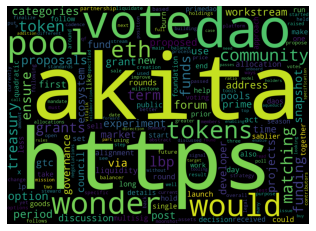

In [86]:
firstcloud = WordCloud(stopwords=STOPWORDS,
                        background_color='black',
                        width=2500,
                        height=1800
                         ).generate_from_frequencies(first_topic_words)
plt.imshow(firstcloud)
plt.axis('off')
plt.show()

In [87]:
del second_topic_words ['proposed']
del second_topic_words ['gitcoin']
del second_topic_words ['https']

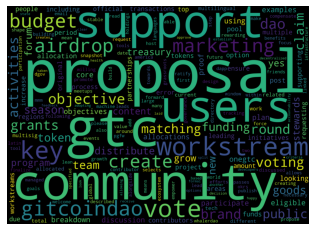

In [88]:
cloud = WordCloud(stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate_from_frequencies(second_topic_words)
plt.imshow(cloud)
plt.axis('off')
plt.show()

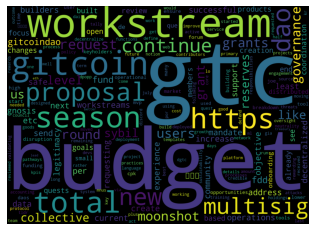

In [89]:
cloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate_from_frequencies(third_topic_words)
plt.imshow(cloud)
plt.axis('off')
plt.show()

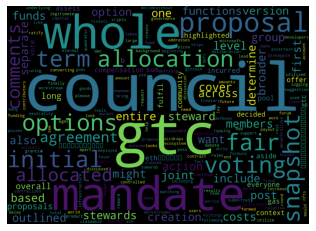

In [90]:


cloud = WordCloud(                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate_from_frequencies(fourth_topic_words)
plt.imshow(cloud)
plt.axis('off')
plt.show()

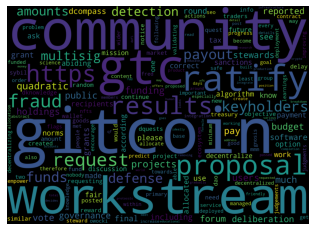

In [91]:

cloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate_from_frequencies(five_topic_words)
plt.imshow(cloud)
plt.axis('off')
plt.show()

## Model evaluation

In [95]:
import importlib

In [96]:
print('\nPerplexity: ', ldamodel.log_perplexity(doc_term_matrix))  


Perplexity:  -7.154343474268933
